## 개념 설명
### 용어 설명
- 비지도학습: 훈련 데이터에 타깃이 없음. 외부의 도움 없이 스스로 학습해야 함.
- 히스토그램
    - 구간별로 값이 발생한 빈도를 그래프로 표시한 것
    - X축이 계급의 구간, Y축이 발생 빈도(도수)
- 군집
    - 비슷한 샘플끼리 하나의 그룹으로 모으는 학습 방법
    - 군집 알고리즘으로 모은 샘플 집합을 클러스터라고 함.
### 핵심 패키지와 함수 (numpy / matplotlib)
- np.load(): npy 파일 로드
- plt.imshow()
    - numpy로 저장된 배열을 이미지로 출력
    - cmap 매개변수를 통해 배경을 색상을 지정할 수 있음
- plt.hist(): 히스토그램을 시각화
- plt.subplots(행, 열, figsize=(가로, 세로))
    - 이 함수 선언 이후, 어려 이미지나 그래프를 하나의 화면으로 시각화
    - figsize 매개변수를 통해 각각의 크기를 지정 가능함
### 전체적인 과정
- 데이터 준비하기
- 넘파이 평균을 이용해 픽셀값 계산하기
- 실제값과 평균의 차이의 평균을 계산하여, 평균값과 가까운 사진 고르기

In [4]:
'''데이터 수집'''
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-02-04 14:14:31--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-04 14:14:31--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-04 14:14:31--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

In [15]:
'''데이터 불러오고, 확인하기'''
import numpy as np
import matplotlib.pyplot as plt
# 데이터 불러오기
fruits = np.load('fruits_300.npy')
# 데이터 확인하기
print(fruits.shape)
print(fruits[0, 0, :])

(300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


<function matplotlib.pyplot.show(close=None, block=None)>

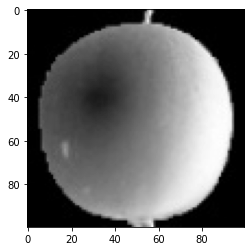

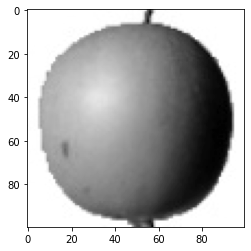

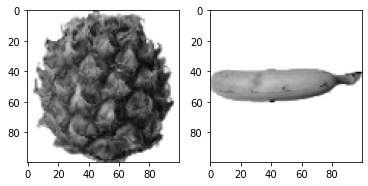

In [17]:
'''이미지로 확인하기'''
# 그레이로 처리한 이유: 짙은 부분의 픽셀값은 255에 가까움. 픽셀값과 출력은 정비례한다. 출력이 큰 값이 의미를 부여하기 좋음.
plt.imshow(fruits[0], cmap='gray') # 이미지 파일로 출력
plt.show()
plt.imshow(fruits[0], cmap='gray_r') # 이미지 파일로 출력
plt.show()

# 다른 과일 확인하기
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

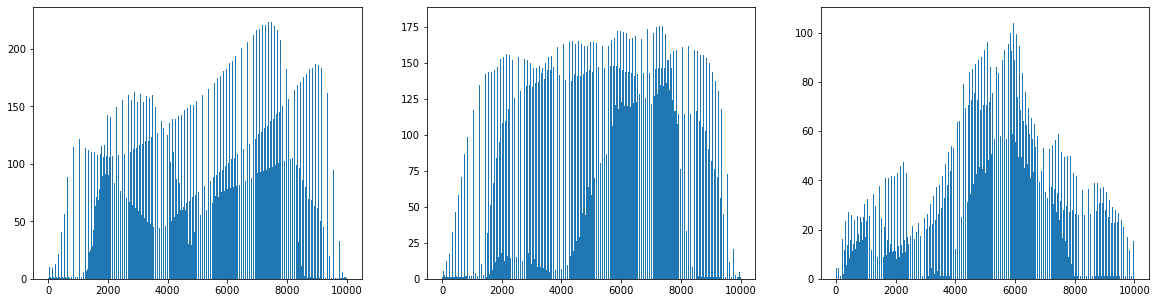

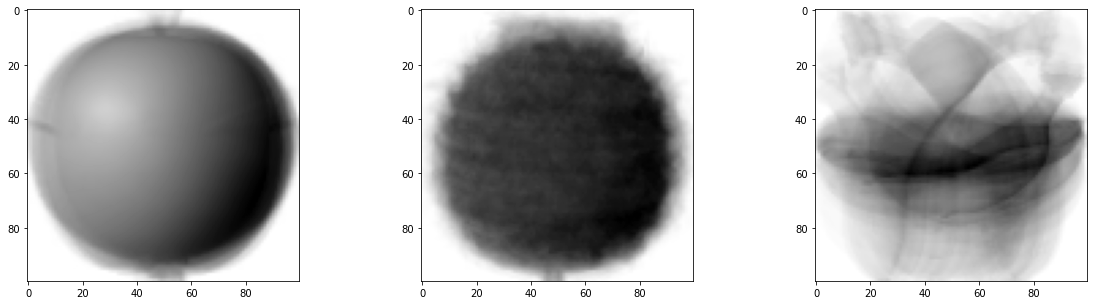

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


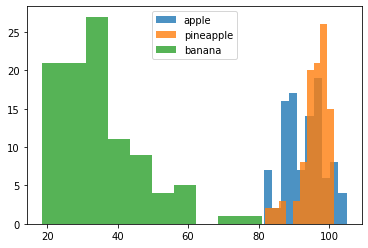

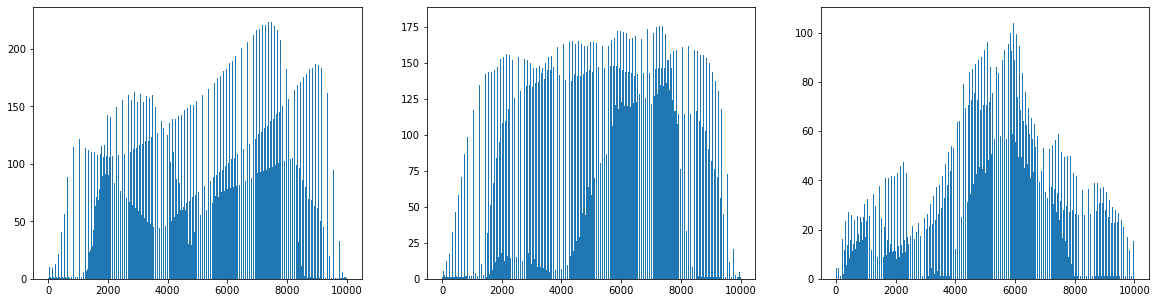

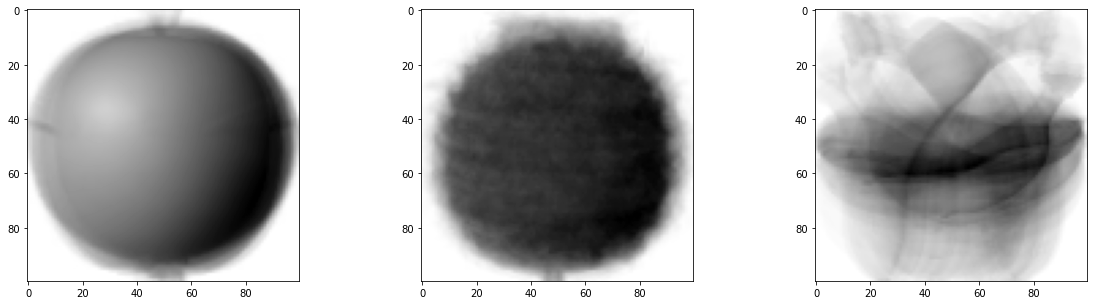

In [28]:
'''픽셀값 분석하기'''
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana =  fruits[200:300].reshape(-1, 100*100)
print(apple.shape)
# 픽셀 평균값 계산
print(apple.mean(axis=1))
# 샘플의 평균을 히스토그램으로 시각화
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()
# 픽셀별 평균값을 bar로 시각화
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()
# 픽셀의 평균값을 이미지로 변환
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

(300,)


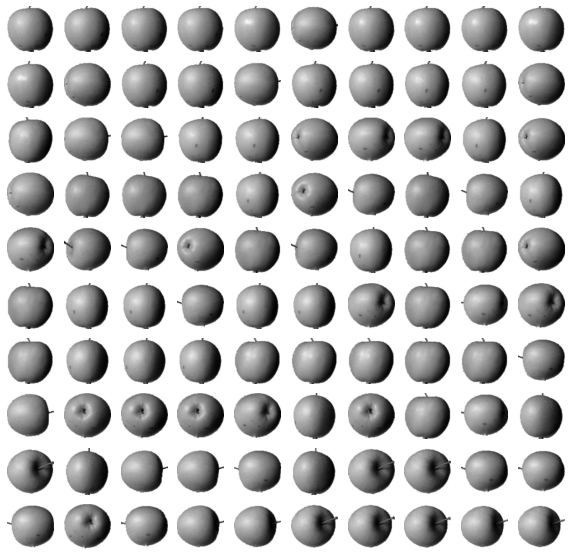

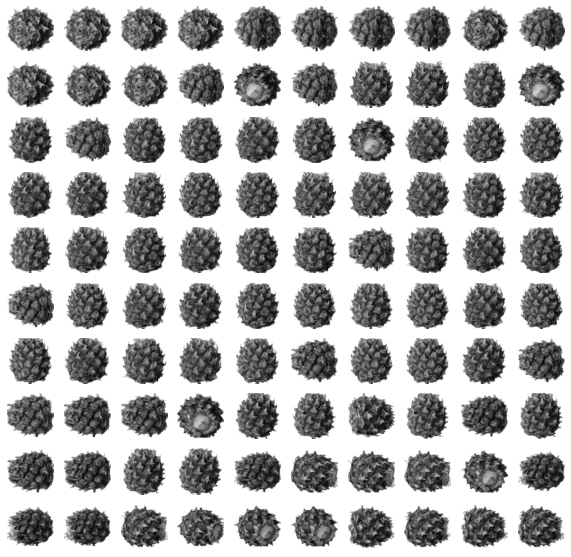

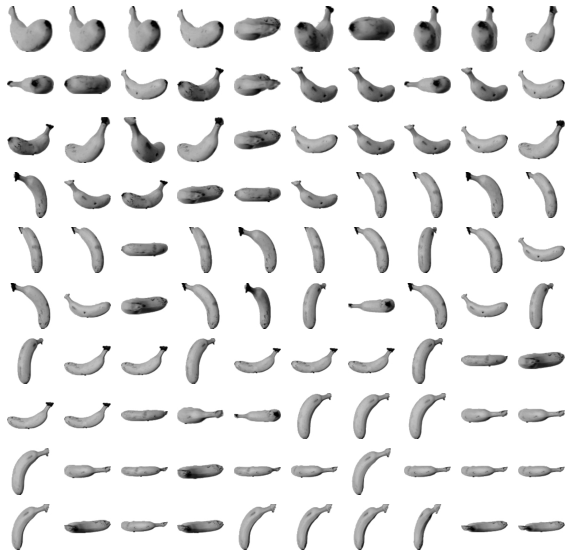

In [36]:
'''평균값과 가까운 사진 고르기'''
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

# 사과와 비슷한 이미지 찾기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 파인애플과 비슷한 이미지 찾기
pineapple_index = np.argsort(abs_mean)[100:200]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 바나나와 비슷한 이미지 찾기
banana_index = np.argsort(abs_mean)[200:300]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()